In [3]:
import os
import re
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from kolmov import ktable, kplot

In [4]:
tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              # Tight
              'tight_pd_ref'    : "reference/tight_cutbased/pd_ref#0",
              'tight_fa_ref'    : "reference/tight_cutbased/fa_ref#0",
              'tight_sp_ref'    : "reference/tight_cutbased/sp_ref",
              'tight_pd_val'    : "reference/tight_cutbased/pd_val#0",
              'tight_fa_val'    : "reference/tight_cutbased/fa_val#0",
              'tight_sp_val'    : "reference/tight_cutbased/sp_val",
              'tight_pd_op'     : "reference/tight_cutbased/pd_op#0",
              'tight_fa_op'     : "reference/tight_cutbased/fa_op#0",
              'tight_sp_op'     : "reference/tight_cutbased/sp_op",
              # Medium
              'medium_pd_ref'   : "reference/medium_cutbased/pd_ref#0",
              'medium_fa_ref'   : "reference/medium_cutbased/fa_ref#0",
              'medium_sp_ref'   : "reference/medium_cutbased/sp_ref",
              'medium_pd_val'   : "reference/medium_cutbased/pd_val#0",
              'medium_fa_val'   : "reference/medium_cutbased/fa_val#0",
              'medium_sp_val'   : "reference/medium_cutbased/sp_val",
              'medium_pd_op'    : "reference/medium_cutbased/pd_op#0",
              'medium_fa_op'    : "reference/medium_cutbased/fa_op#0",
              'medium_sp_op'    : "reference/medium_cutbased/sp_op",
              # Loose
              'loose_pd_ref'    : "reference/loose_cutbased/pd_ref#0",
              'loose_fa_ref'    : "reference/loose_cutbased/fa_ref#0",
              'loose_sp_ref'    : "reference/loose_cutbased/sp_ref",
              'loose_pd_val'    : "reference/loose_cutbased/pd_val#0",
              'loose_fa_val'    : "reference/loose_cutbased/fa_val#0",
              'loose_sp_val'    : "reference/loose_cutbased/sp_val",
              'loose_pd_op'     : "reference/loose_cutbased/pd_op#0",
              'loose_fa_op'     : "reference/loose_cutbased/fa_op#0",
              'loose_sp_op'     : "reference/loose_cutbased/sp_op",
              # Very Loose
              'vloose_pd_ref'   : "reference/vloose_cutbased/pd_ref#0",
              'vloose_fa_ref'   : "reference/vloose_cutbased/fa_ref#0",
              'vloose_sp_ref'   : "reference/vloose_cutbased/sp_ref",
              'vloose_pd_val'   : "reference/vloose_cutbased/pd_val#0",
              'vloose_fa_val'   : "reference/vloose_cutbased/fa_val#0",
              'vloose_sp_val'   : "reference/vloose_cutbased/sp_val",
              'vloose_pd_op'    : "reference/vloose_cutbased/pd_op#0",
              'vloose_fa_op'    : "reference/vloose_cutbased/fa_op#0",
              'vloose_sp_op'    : "reference/vloose_cutbased/sp_op",
               # Counts
              'tight_pd_ref_passed'    : "reference/tight_cutbased/pd_ref#1",
              'tight_fa_ref_passed'    : "reference/tight_cutbased/fa_ref#1",
              'tight_pd_ref_total'    : "reference/tight_cutbased/pd_ref#2",
              'tight_fa_ref_total'    : "reference/tight_cutbased/fa_ref#2",
              
              'tight_pd_val_passed'    : "reference/tight_cutbased/pd_val#1",
              'tight_fa_val_passed'    : "reference/tight_cutbased/fa_val#1",
              'tight_pd_val_total'     : "reference/tight_cutbased/pd_val#2",
              'tight_fa_val_total'     : "reference/tight_cutbased/fa_val#2",
              
              'tight_pd_op_passed'     : "reference/tight_cutbased/pd_op#1",
              'tight_fa_op_passed'     : "reference/tight_cutbased/fa_op#1",
              'tight_pd_op_total'     : "reference/tight_cutbased/pd_op#2",
              'tight_fa_op_total'     : "reference/tight_cutbased/fa_op#2",
              } )

In [5]:
kt = ktable( 'data/*/*', tuned_info )


2020-03-28 02:32:07,806 | Py.ktable                               INFO There are 188 files for this task...
2020-03-28 02:32:07,806 | Py.ktable                               INFO Filling the table... 
2020-03-28 02:32:09,957 | Py.ktable                               INFO End of fill step, a pandas DataFrame was created...


In [6]:
table = kt.get_pandas_table()
table.head(10)

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_passed,tight_fa_val_passed,tight_pd_val_total,tight_fa_val_total,tight_pd_op_passed,tight_fa_op_passed,tight_pd_op_total,tight_fa_op_total
0,v8,2,0,0,1,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.991327,0.995125,...,4069496,223869,425792.160781,4123.261491,429337,429337,4.257967e+06,41673.845620,4293365,4293365
1,v8,2,0,1,1,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,1,0.991329,0.994321,...,4069496,223869,425804.820921,4180.795372,429337,429337,4.257938e+06,42095.762142,4293365,4293365
2,v8,2,0,2,1,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,2,0.991346,0.994265,...,4069496,223869,425794.270805,4065.727610,429337,429337,4.257962e+06,41232.751073,4293365,4293365
3,v8,2,0,3,1,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,3,0.991329,0.994142,...,4069496,223869,425778.445630,4161.617412,429337,429337,4.257956e+06,42057.406095,4293365,4293365
4,v8,2,0,4,1,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,4,0.991341,0.993360,...,4069496,223869,425791.105770,4104.083531,429337,429337,4.257940e+06,41616.311548,4293365,4293365
5,v8,2,0,5,5,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.991553,0.995218,...,4069496,223869,425802.774139,4123.436076,429336,429336,4.257958e+06,38931.388223,4293365,4293365
6,v8,2,0,6,5,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,1,0.991254,0.995562,...,4069496,223869,425791.169038,4391.938890,429336,429336,4.257891e+06,40964.258741,4293365,4293365
7,v8,2,0,7,5,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,2,0.991220,0.995402,...,4069496,223869,425780.618946,4411.117663,429336,429336,4.257940e+06,41654.667596,4293365,4293365
8,v8,2,0,8,5,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,3,0.991571,0.995164,...,4069496,223869,425763.738798,4257.687483,429336,429336,4.257946e+06,39602.619054,4293365,4293365
9,v8,2,0,0,3,1,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.991775,0.994004,...,4069496,223869,425788.995746,3969.837808,429337,429337,4.257956e+06,41731.379691,4293365,4293365


### Get the best inits table

In [7]:
best_inits = kt.filter_inits("max_sp_val")
best_inits.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_passed,tight_fa_val_passed,tight_pd_val_total,tight_fa_val_total,tight_pd_op_passed,tight_fa_op_passed,tight_pd_op_total,tight_fa_op_total
519,v10,2,0,0,0,3,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.993690,0.995646,...,4069496,223869,425809.000000,2627.000000,429337,429337,4.257945e+06,28536.000000,4293365,4293365
466,v11,2,0,0,1,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.992990,0.995810,...,4069496,223869,425840.691318,3260.253272,429337,429337,4.257836e+06,26657.453019,4293365,4293365
499,v10,2,0,0,2,0,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.993055,0.995449,...,4069496,223869,425793.000000,3164.000000,429337,429337,4.257945e+06,27999.000000,4293365,4293365
464,v11,2,0,0,3,2,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.993443,0.995823,...,4069496,223869,425824.866143,2953.405905,429337,429337,4.257933e+06,27654.710255,4293365,4293365
449,v11,2,0,0,4,2,/Users/jodafons/Desktop/HEP/saphyra/external/k...,0,0.993074,0.996203,...,4069496,223869,425835.416260,2991.761826,429337,429337,4.257915e+06,28057.448754,4293365,4293365


### Get the Cross validation table

In [8]:
# Get the eff table for all tunings
cv_table = kt.describe( best_inits )
cv_table.head()

,train_tag,et_bin,eta_bin,max_sp_val_mean,max_sp_val_std,max_sp_pd_val_mean,max_sp_pd_val_std,max_sp_fa_val_mean,max_sp_fa_val_std,max_sp_op_mean,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_total_mean,tight_pd_val_total_std,tight_fa_val_total_mean,tight_fa_val_total_std,tight_pd_op_total_mean,tight_pd_op_total_std,tight_fa_op_total_mean,tight_fa_op_total_std
0,v10,2,0,0.993351,0.000300,0.995818,0.000227,0.009113,0.000627,0.993437,...,4069496,223869,429336.333333,0.516398,429336.333333,0.516398,4293365.0,0.0,4293365.0,0.0
1,v11,2,0,0.993117,0.000222,0.995708,0.000509,0.009470,0.000552,0.993475,...,4069496,223869,429336.750000,0.500000,429336.750000,0.500000,4293365.0,0.0,4293365.0,0.0
2,v8,2,0,0.991802,0.000342,0.994623,0.000744,0.011015,0.000790,0.991679,...,4069496,223869,429336.500000,0.503155,429336.500000,0.503155,4293365.0,0.0,4293365.0,0.0


### Get the integrated table for v8 tag

In [9]:
# Get integrated table
int_table = kt.integrate( best_inits, 'v8')
(int_table.head()*100).round(4)

,tight_pd_ref,tight_fa_ref,tight_pd_val,tight_fa_val,tight_pd_op,tight_fa_op
mean,99.175,7.244,99.1741,0.9210,99.1750,0.9198
std,0.000,0.000,0.0020,0.0378,0.0001,0.0098


### Create the Beamer Presentation

In [10]:
# Create beamer presentation
kt.dump_beamer_table( best_inits ,  [15,20,25,30,40,50], 
                     [0, 0.8 , 1.37, 1.54, 2.37, 2.5], 
                     ['tight'],
                     tags = ['v8', 'v10', 'v11'])

2020-03-28 02:32:10,582 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file test.pdf latex code...


### Create monitoring plots

In [16]:
# Dump all v8 training for each tag
kt.dump_all_history( best_inits, 'history_v8','v8' )

2020-03-28 02:43:50,790 | Py.kplot                                INFO Reading 80 files...


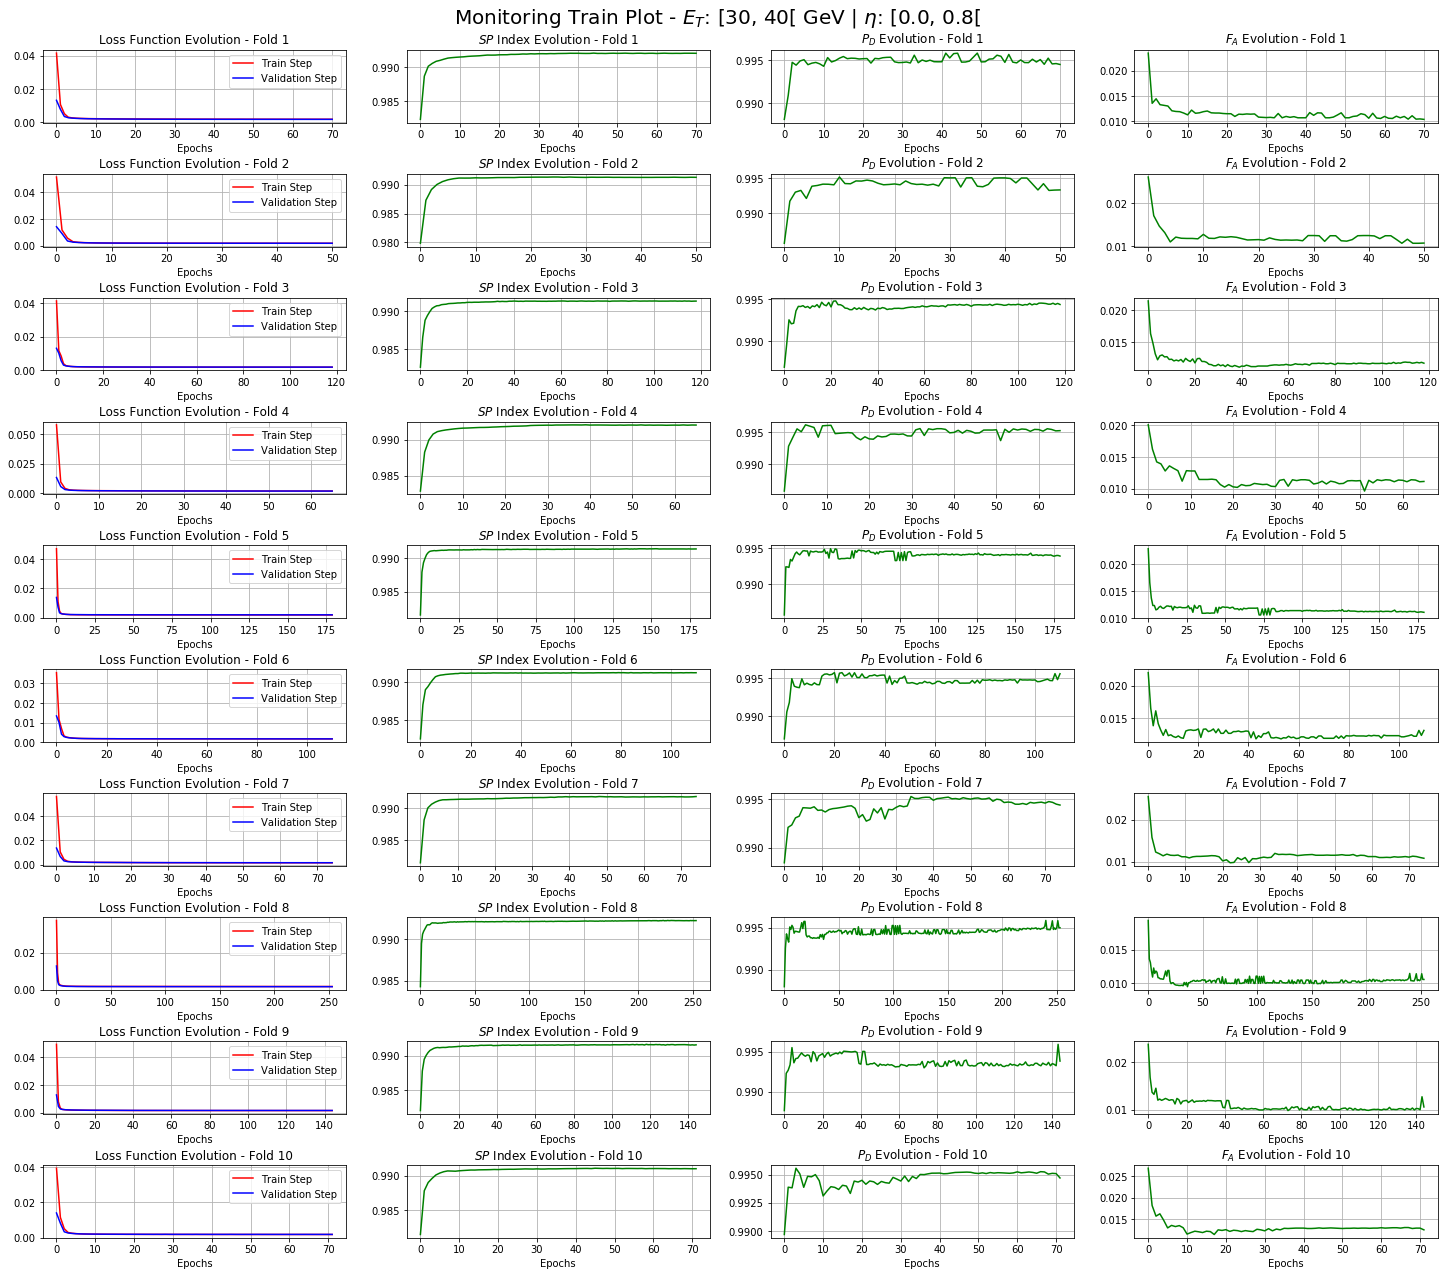

In [2]:
from kolmov import kplot    
kplot( 'history_v8', 1).plot_training_curves(2, 0, '.', 'test')